# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import seaborn as sns
import numpy as np

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
saham_df = pd.read_csv("Dataset_clustering.csv")
saham_df.head()

,Date,Open,High,Low,Close,Change,Change(%),Ratio(%),Volume,Value(T),Interval_High_Open,Interval_Open_From_LastDay,Interval_Open_From_LastDay(%)
0,8/30/2021,438,462,434,450,Rise,14,3.21,"5,444,095","244,258,988",24,2,0.458715596
1,8/27/2021,432,462,410,436,Unchnaged,0,0.00,"5,179,738","229,353,044",30,-4,-0.917431193
2,8/26/2021,470,472,436,436,Lower limit,32,6.83,"5,266,867","239,652,022",2,2,0.427350427
3,8/25/2021,476,500,452,468,Unchnaged,0,0.00,"14,433,942","691,292,155",24,8,1.709401709
4,8/24/2021,424,494,408,468,Rise,48,11.42,"14,218,161","640,991,240",70,4,0.952380952


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           1857 non-null   object 
 1   Open                           1857 non-null   int64  
 2   High                           1857 non-null   int64  
 3   Low                            1857 non-null   int64  
 4   Close                          1857 non-null   int64  
 5   Change                         1841 non-null   object 
 6   Change(%)                      1857 non-null   int64  
 7   Ratio(%)                       1857 non-null   float64
 8   Volume                         1857 non-null   object 
 9   Value(T)                       1857 non-null   object 
 10  Interval_High_Open             1857 non-null   int64  
 11  Interval_Open_From_LastDay     1857 non-null   int64  
 12  Interval_Open_From_LastDay(%)

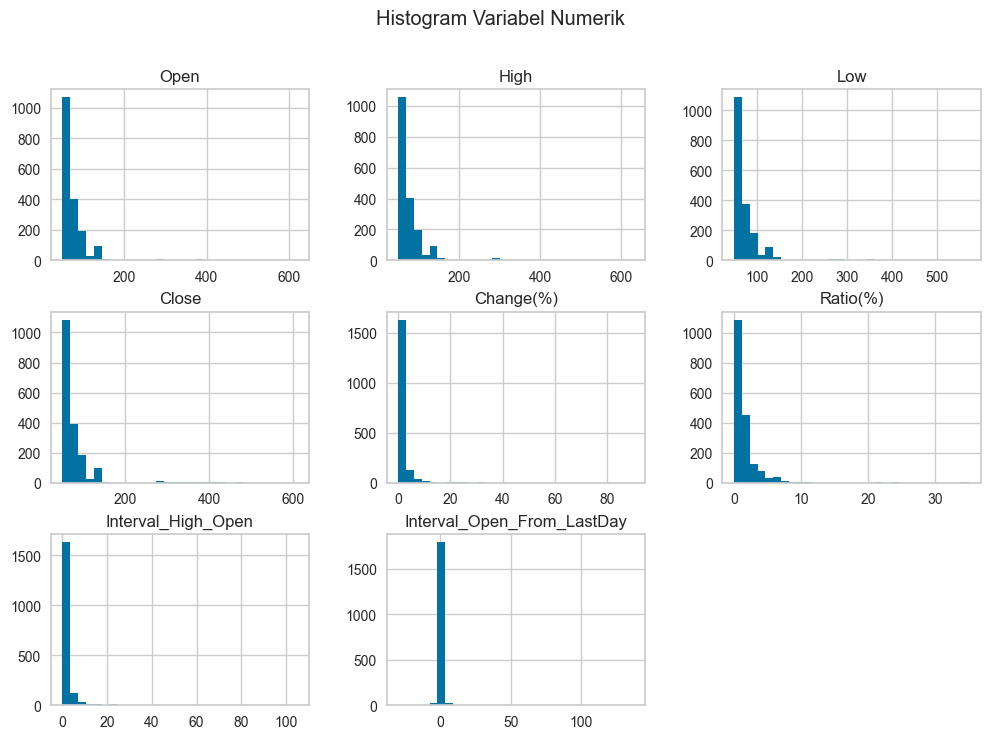

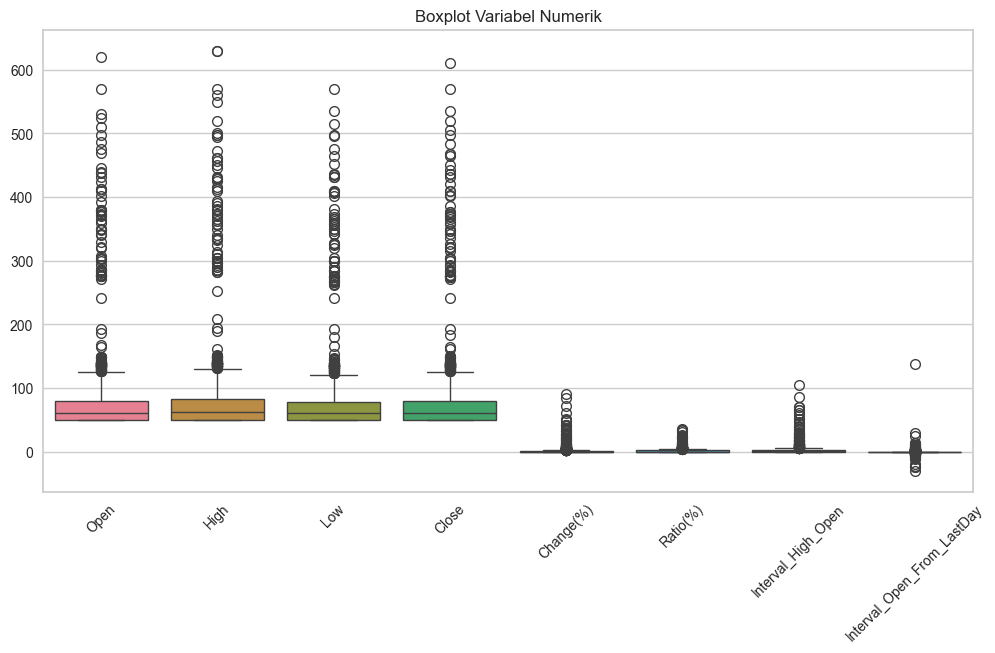

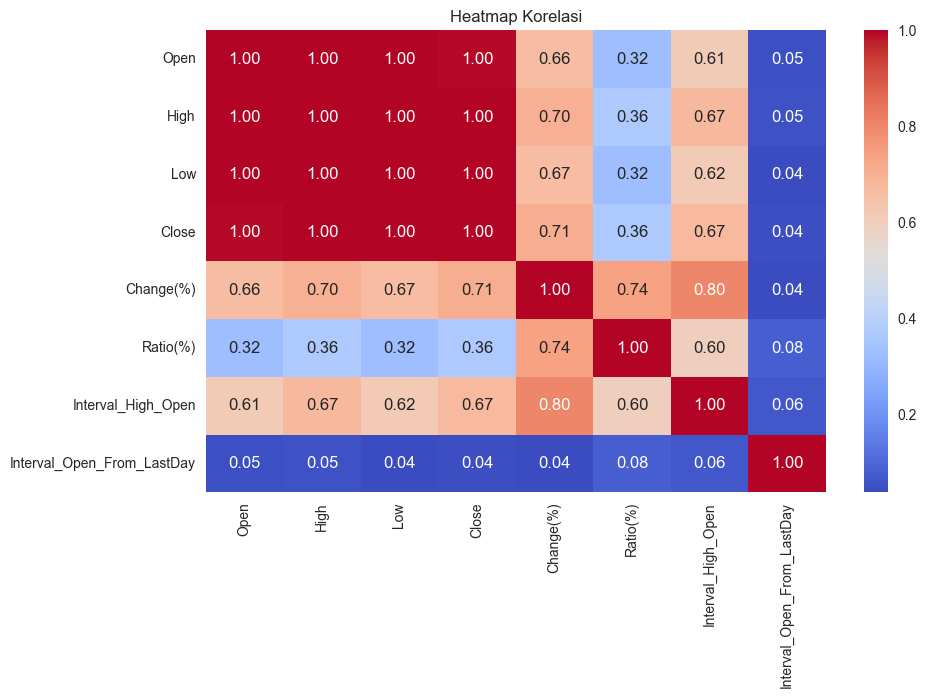

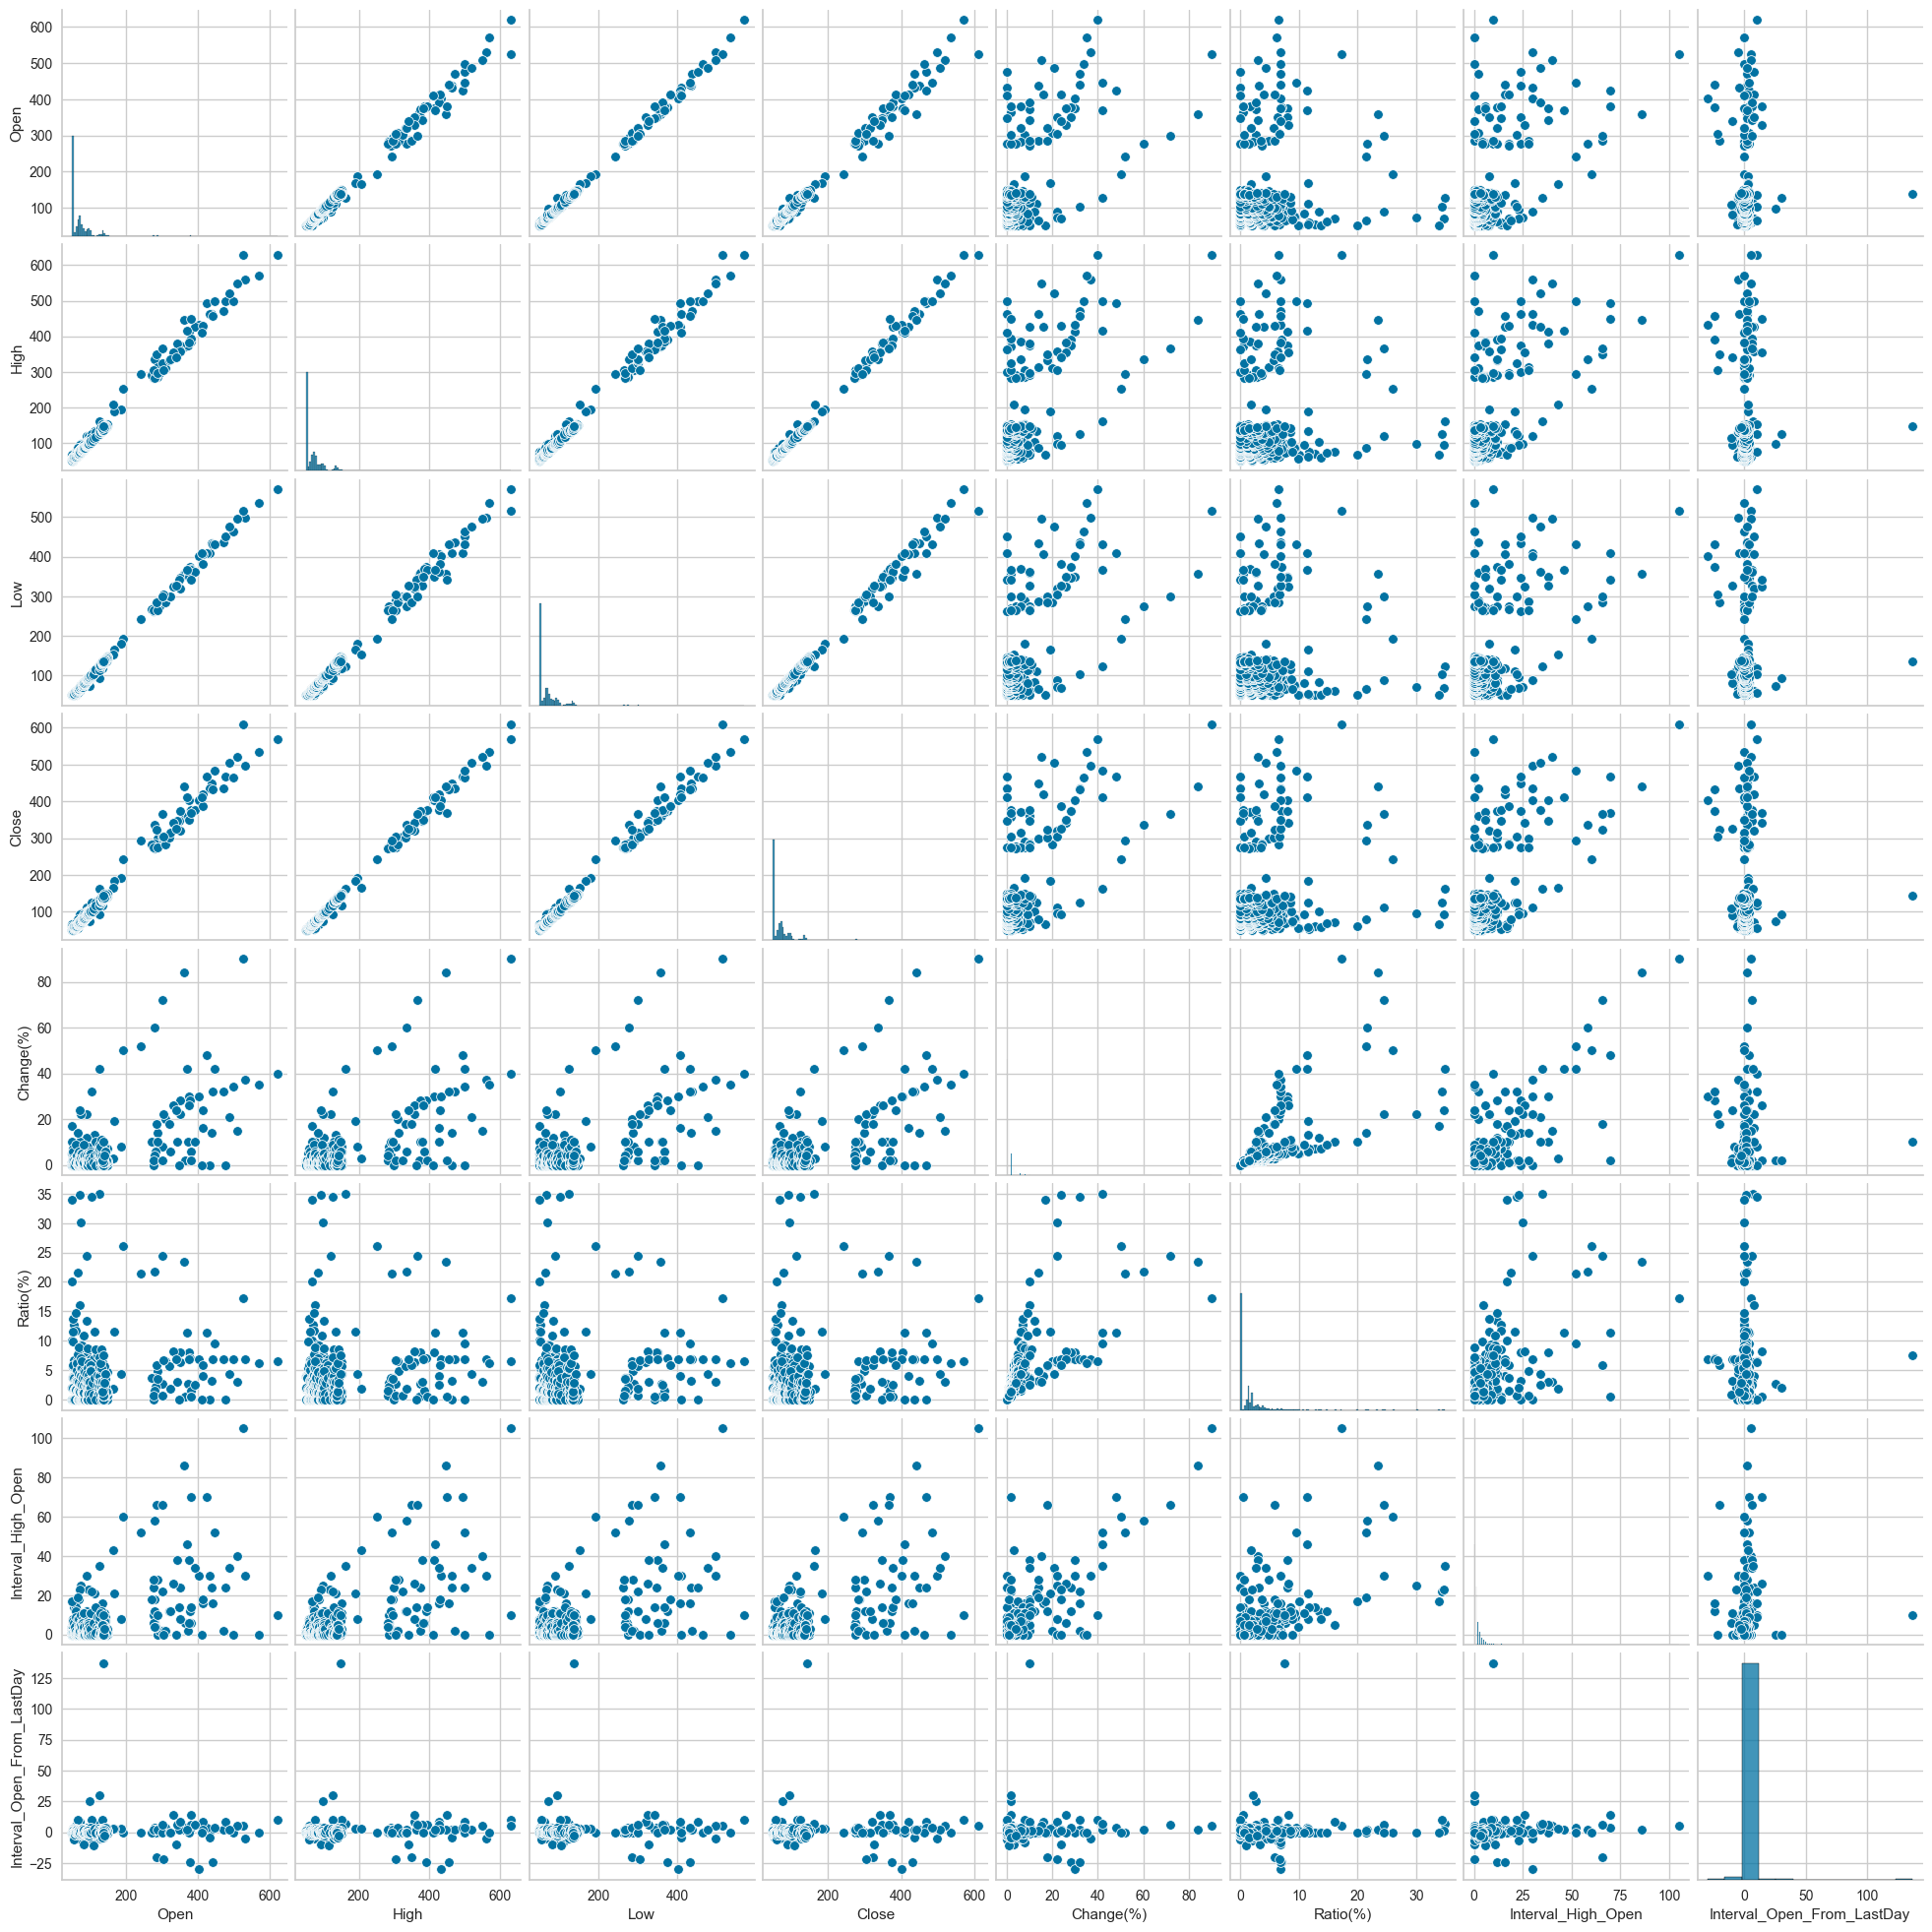

C:\Users\fatta\AppData\Local\Temp\ipykernel_13556\3908886533.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=saham_df[col], palette='viridis')


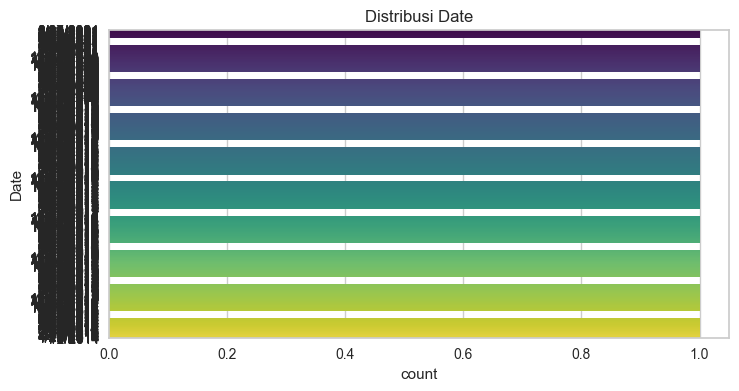

C:\Users\fatta\AppData\Local\Temp\ipykernel_13556\3908886533.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=saham_df[col], palette='viridis')


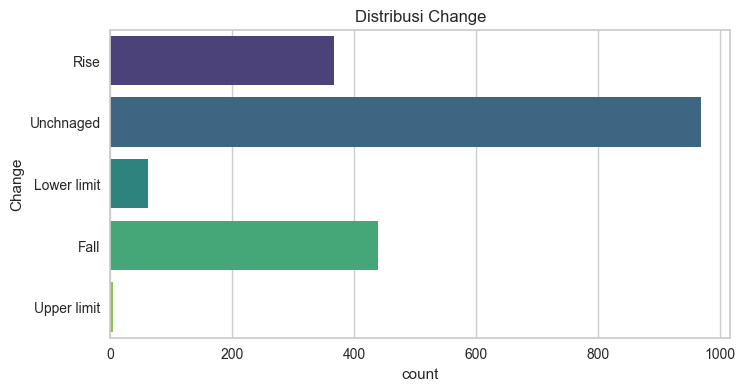

C:\Users\fatta\AppData\Local\Temp\ipykernel_13556\3908886533.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=saham_df[col], palette='viridis')


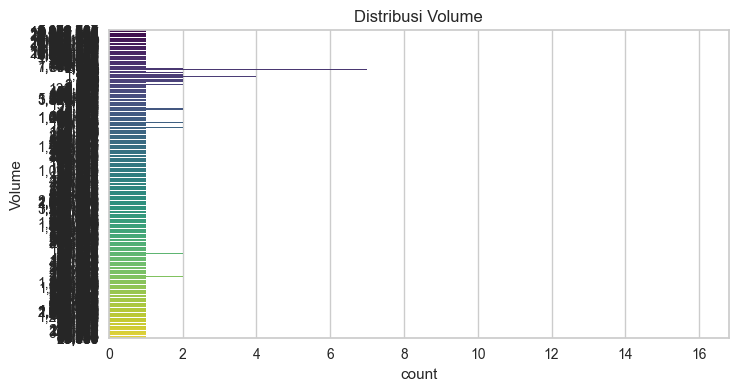

C:\Users\fatta\AppData\Local\Temp\ipykernel_13556\3908886533.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=saham_df[col], palette='viridis')


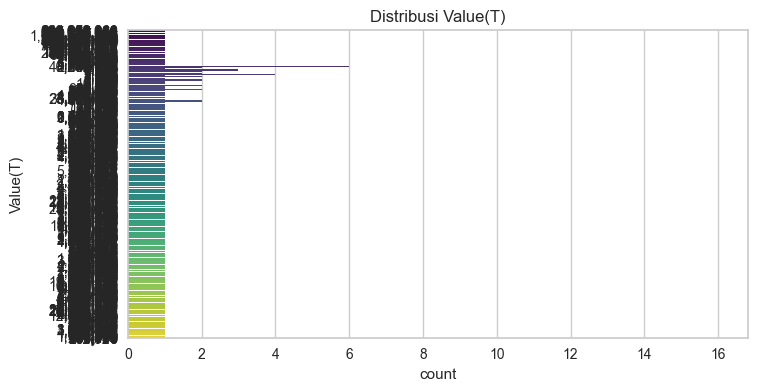

C:\Users\fatta\AppData\Local\Temp\ipykernel_13556\3908886533.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=saham_df[col], palette='viridis')


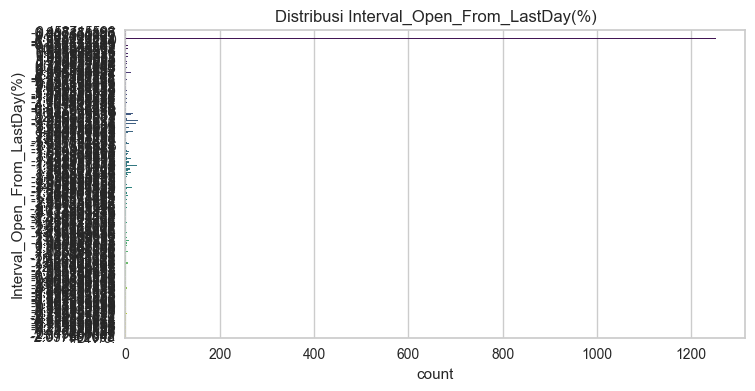

In [3]:
# 1. Memahami Struktur Data
print("Informasi Dataset:")
saham_df.info()
print("\nStatistik Deskriptif:\n", saham_df.describe())
print("\nJumlah Baris dan Kolom:", saham_df.shape)

# 2. Meninjau Data yang Hilang
print("\nJumlah Data yang Hilang:")
print(saham_df.isnull().sum())

# 3. Analisis Distribusi Variabel Numerik
numeric_columns = saham_df.select_dtypes(include=[np.number]).columns

saham_df[numeric_columns].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram Variabel Numerik")
plt.show()

# Boxplot untuk outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=saham_df[numeric_columns])
plt.xticks(rotation=45)
plt.title("Boxplot Variabel Numerik")
plt.show()

# 4. Analisis Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(saham_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

# Scatterplot antar variabel numerik
sns.pairplot(saham_df[numeric_columns])
plt.show()

# 5. Visualisasi Variabel Kategorikal
categorical_columns = saham_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=saham_df[col], palette='viridis')
    plt.title(f"Distribusi {col}")
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.


Jumlah Data yang Hilang Setelah Penanganan:
Date                              0
Open                              0
High                              0
Low                               0
Close                             0
Change                           16
Change(%)                         0
Ratio(%)                          0
Volume                            0
Value(T)                          0
Interval_High_Open                0
Interval_Open_From_LastDay        0
Interval_Open_From_LastDay(%)     0
dtype: int64

Jumlah Data Setelah Menghapus Duplikasi: (1857, 13)


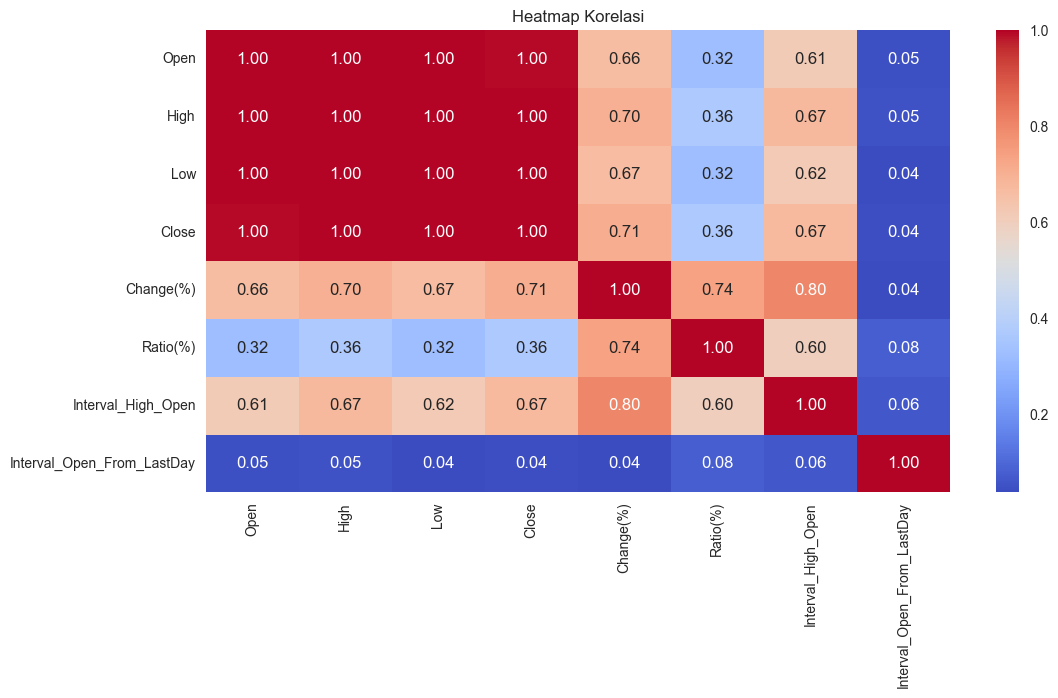

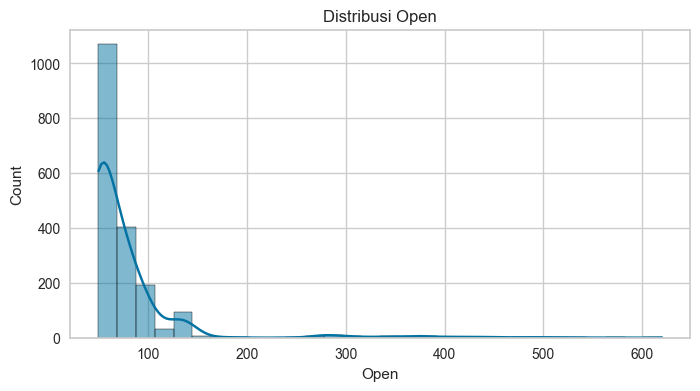

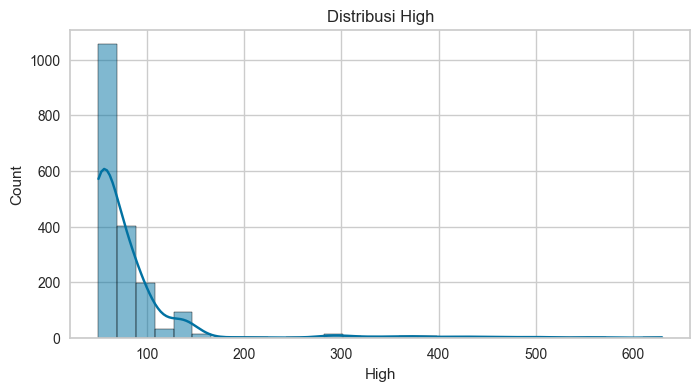

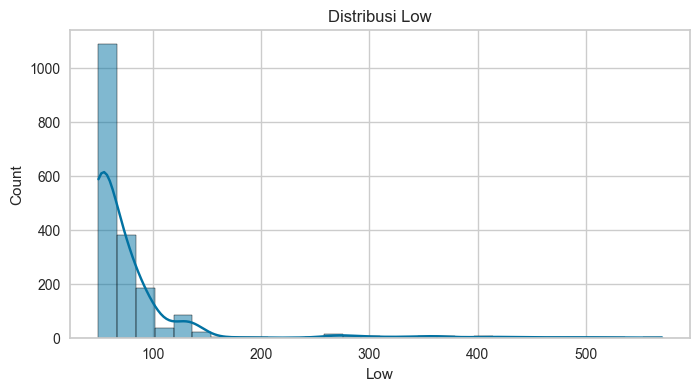

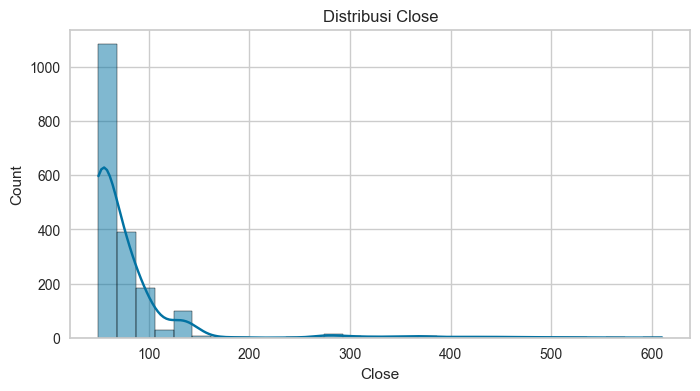

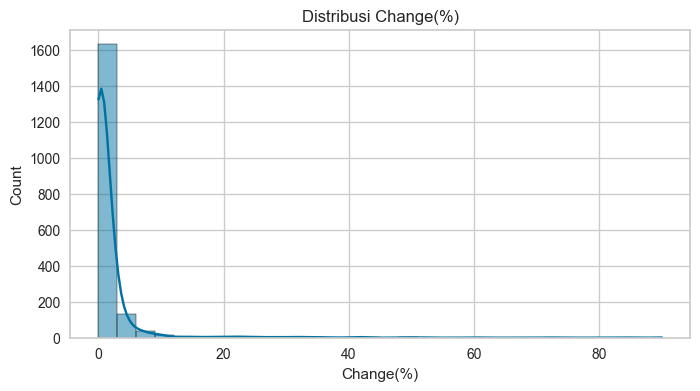

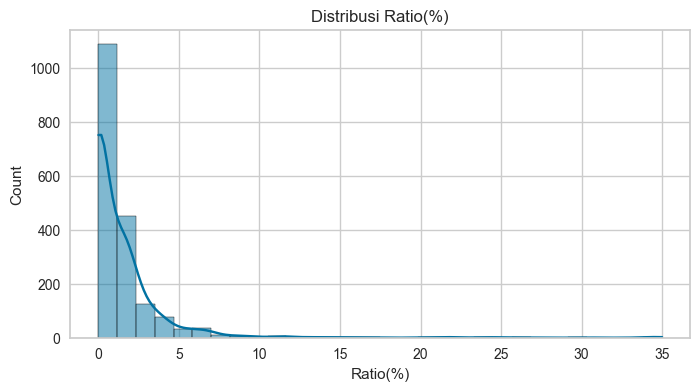

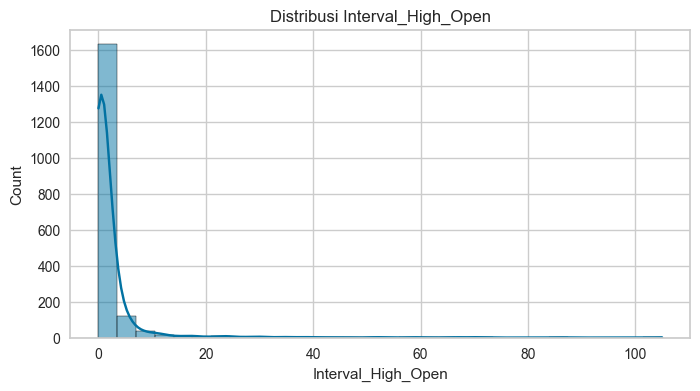

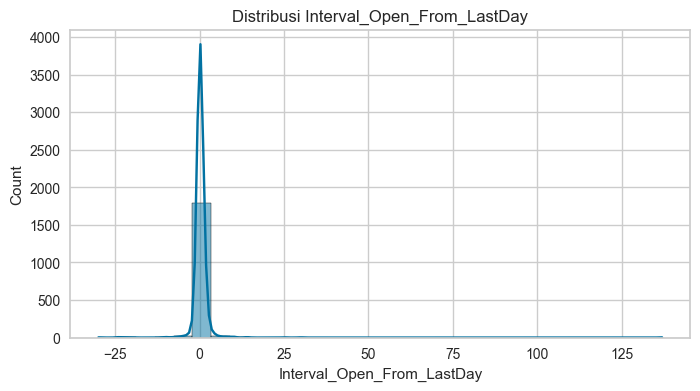


Jumlah Data Setelah Menghapus Outlier: (1016, 13)


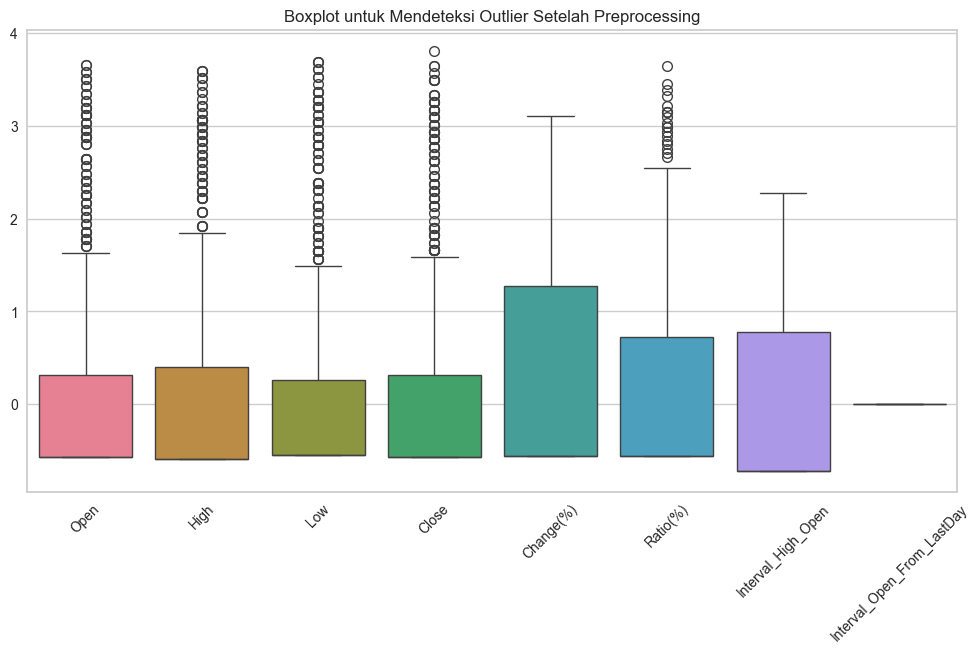

In [4]:
# 2. Analisis Data yang Hilang
numeric_cols = saham_df.select_dtypes(include=['int64', 'float64']).columns
saham_df[numeric_cols] = saham_df[numeric_cols].fillna(saham_df[numeric_cols].median())  # Mengisi nilai kosong dengan median
print("\nJumlah Data yang Hilang Setelah Penanganan:")
print(saham_df.isnull().sum())

# 3. Menghapus Data Duplikat
saham_df.drop_duplicates(inplace=True)
print("\nJumlah Data Setelah Menghapus Duplikasi:", saham_df.shape)

# 4. Analisis Distribusi dan Korelasi
plt.figure(figsize=(12,6))
sns.heatmap(saham_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

# Visualisasi Distribusi Data
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(saham_df[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.show()

# 5. Deteksi dan Penanganan Outlier
for col in numeric_cols:
    Q1 = saham_df[col].quantile(0.25)
    Q3 = saham_df[col].quantile(0.75)
    IQR = Q3 - Q1
    saham_df = saham_df[(saham_df[col] >= (Q1 - 1.5 * IQR)) & (saham_df[col] <= (Q3 + 1.5 * IQR))]
print("\nJumlah Data Setelah Menghapus Outlier:", saham_df.shape)

# 6. Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()
saham_df[numeric_cols] = scaler.fit_transform(saham_df[numeric_cols])

# 7. Encoding Data Kategorikal (Tanpa Tanggal)
categorical_cols = saham_df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    if "tanggal" not in col.lower():  # Menghindari encoding kolom tanggal
        le = LabelEncoder()
        saham_df[col] = le.fit_transform(saham_df[col])
        label_encoders[col] = le

# 8. Boxplot untuk Mendeteksi Outlier Setelah Preprocessing
plt.figure(figsize=(12,6))
sns.boxplot(data=saham_df[numeric_cols])
plt.title("Boxplot untuk Mendeteksi Outlier Setelah Preprocessing")
plt.xticks(rotation=45)
plt.show()


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Silhouette Score untuk k=2: 0.6426884218454334
Silhouette Score untuk k=3: 0.6500030496816058
Silhouette Score untuk k=4: 0.6709156566812623
Silhouette Score untuk k=5: 0.6934681264593892
Silhouette Score untuk k=6: 0.7473688079576993
Silhouette Score untuk k=7: 0.7428773345509629
Silhouette Score untuk k=8: 0.7521616120076672
Silhouette Score untuk k=9: 0.7583671551959511
Silhouette Score untuk k=10: 0.7579711748720965

Jumlah klaster optimal: 9


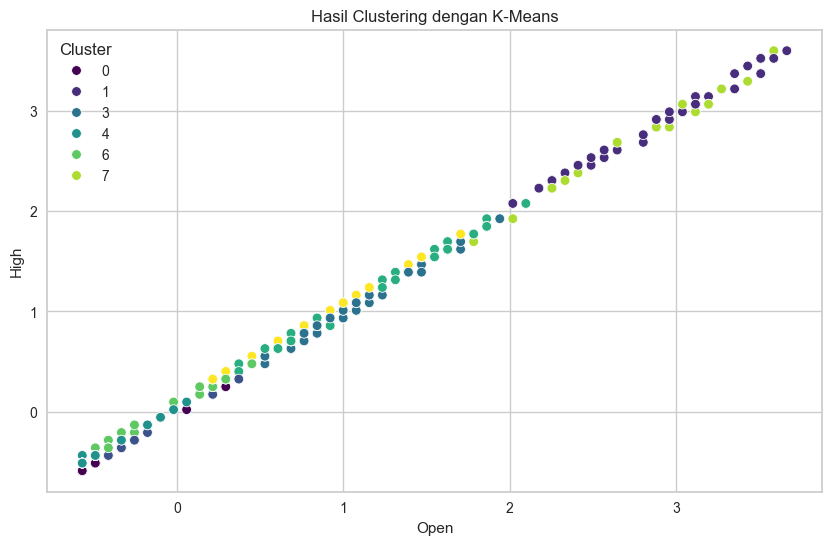

In [5]:
# 9. Clustering dengan K-Means
# Menentukan jumlah klaster optimal dengan metode Silhouette Score
best_k = 2
best_score = -1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(saham_df[numeric_cols])
    score = silhouette_score(saham_df[numeric_cols], labels)
    print(f"Silhouette Score untuk k={k}: {score}")
    if score > best_score:
        best_k = k
        best_score = score

print(f"\nJumlah klaster optimal: {best_k}")

# Latih model K-Means dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=best_k, random_state=42)
saham_df['Cluster'] = kmeans.fit_predict(saham_df[numeric_cols])

# Visualisasi Hasil Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=saham_df[numeric_cols[0]], y=saham_df[numeric_cols[1]], hue=saham_df['Cluster'], palette='viridis')
plt.title("Hasil Clustering dengan K-Means")
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Silhouette Score untuk k=2: 0.6426884218454334
Silhouette Score untuk k=3: 0.6500030496816058
Silhouette Score untuk k=4: 0.6709156566812623
Silhouette Score untuk k=5: 0.6934681264593892
Silhouette Score untuk k=6: 0.7473688079576993
Silhouette Score untuk k=7: 0.7428773345509629
Silhouette Score untuk k=8: 0.7521616120076672
Silhouette Score untuk k=9: 0.7583671551959511
Silhouette Score untuk k=10: 0.7579711748720965


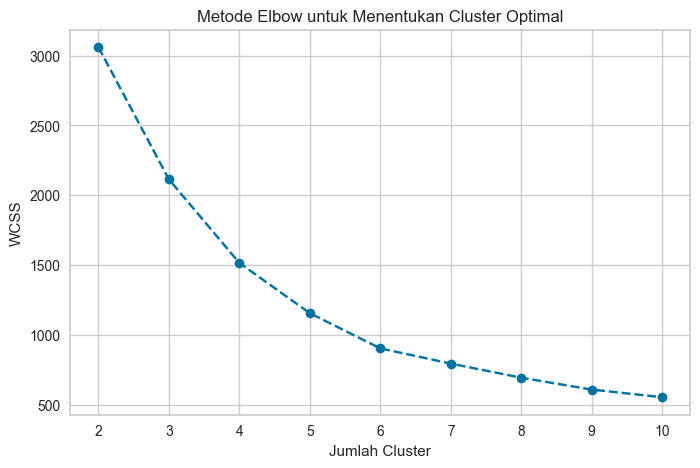

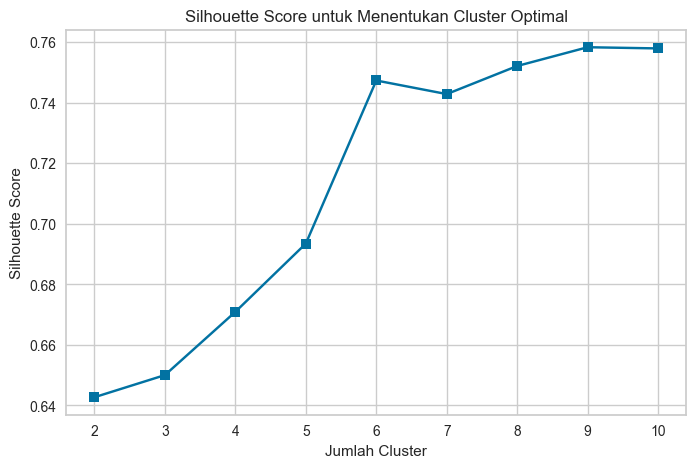


Jumlah klaster optimal berdasarkan Silhouette Score: 9


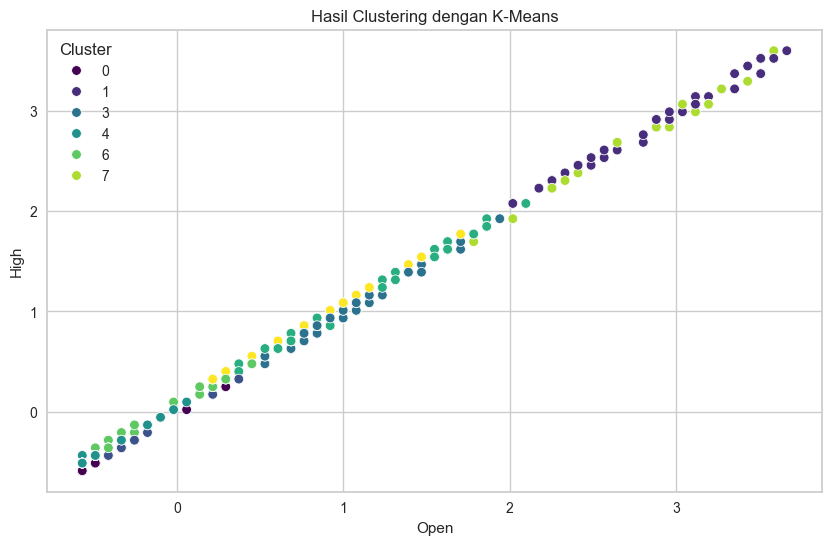

In [6]:
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(saham_df[numeric_cols])
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(saham_df[numeric_cols], labels))
    print(f"Silhouette Score untuk k={k}: {silhouette_scores[-1]}")

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Cluster Optimal')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Cluster Optimal')
plt.show()

# Menentukan jumlah klaster optimal
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nJumlah klaster optimal berdasarkan Silhouette Score: {best_k}")

# Latih model K-Means dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=best_k, random_state=42)
saham_df['Cluster'] = kmeans.fit_predict(saham_df[numeric_cols])

# Visualisasi Hasil Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=saham_df[numeric_cols[0]], y=saham_df[numeric_cols[1]], hue=saham_df['Cluster'], palette='viridis')
plt.title("Hasil Clustering dengan K-Means")
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [7]:
# 10. Feature Selection (Opsional)
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(saham_df[numeric_cols], saham_df['Cluster'])
feature_scores = pd.DataFrame({'Feature': numeric_cols, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("\nFeature Selection berdasarkan ANOVA F-value:")
print(feature_scores)

# Pilih fitur terbaik dan lakukan clustering ulang
selected_features = feature_scores['Feature'][:5].tolist()
kmeans_selected = KMeans(n_clusters=best_k, random_state=42)
saham_df['Cluster_Selected'] = kmeans_selected.fit_predict(saham_df[selected_features])

# Evaluasi ulang dengan Silhouette Score
silhouette_selected = silhouette_score(saham_df[selected_features], saham_df['Cluster_Selected'])
print(f"\nSilhouette Score setelah Feature Selection: {silhouette_selected}")

# Bandingkan hasil sebelum dan sesudah feature selection
print(f"Silhouette Score sebelum Feature Selection: {max(silhouette_scores)}")
print(f"Silhouette Score setelah Feature Selection: {silhouette_selected}")



Feature Selection berdasarkan ANOVA F-value:
                      Feature        Score
1                        High  2172.004200
0                        Open  2054.841873
3                       Close  1982.373335
2                         Low  1970.560394
5                    Ratio(%)  1535.580211
4                   Change(%)  1260.157594
6          Interval_High_Open   505.086438
7  Interval_Open_From_LastDay          NaN

Silhouette Score setelah Feature Selection: 0.8248626644803845
Silhouette Score sebelum Feature Selection: 0.7583671551959511
Silhouette Score setelah Feature Selection: 0.8248626644803845


C:\Users\fatta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\fatta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [8]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

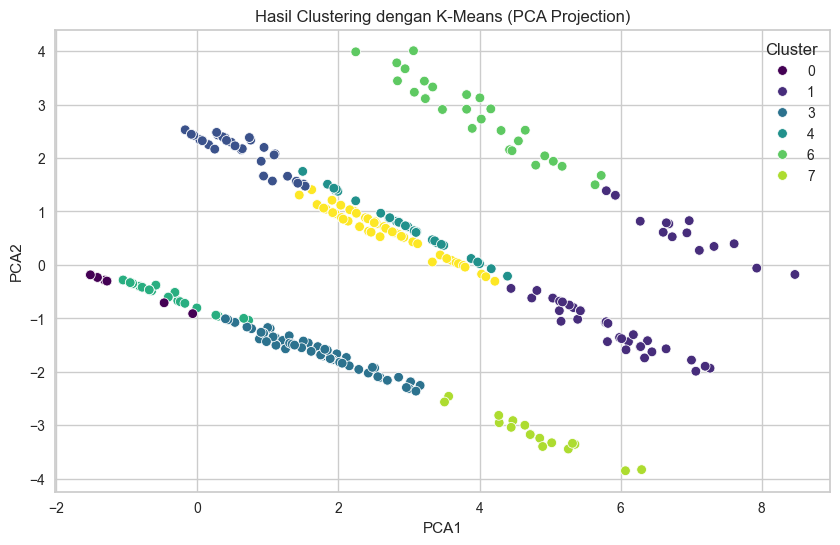


Feature Selection berdasarkan ANOVA F-value:
              Feature        Score
5            Ratio(%)  5058.081491
4           Change(%)  3375.369608
1                High  2177.014389
0                Open  2042.478670
3               Close  2002.414100
2                 Low  1963.893333
6  Interval_High_Open   317.852346

Silhouette Score setelah Feature Selection: 0.8505033255332399
Silhouette Score sebelum Feature Selection: 0.7583671551959511
Silhouette Score setelah Feature Selection: 0.8505033255332399


C:\Users\fatta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\fatta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [9]:
# Latih model K-Means dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
saham_df['Cluster'] = kmeans.fit_predict(saham_df[numeric_cols])

# 10. Visualisasi Hasil Clustering dengan PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(saham_df[numeric_cols])
saham_df['PCA1'] = pca_transformed[:, 0]
saham_df['PCA2'] = pca_transformed[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x=saham_df['PCA1'], y=saham_df['PCA2'], hue=saham_df['Cluster'], palette='viridis')
plt.title("Hasil Clustering dengan K-Means (PCA Projection)")
plt.show()

# 11. Feature Selection (Opsional)
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(saham_df[numeric_cols], saham_df['Cluster'])
feature_scores = pd.DataFrame({'Feature': numeric_cols, 'Score': selector.scores_})
feature_scores = feature_scores.dropna().sort_values(by='Score', ascending=False)
print("\nFeature Selection berdasarkan ANOVA F-value:")
print(feature_scores)

# Pilih fitur terbaik dan lakukan clustering ulang
selected_features = feature_scores['Feature'][:5].tolist()
kmeans_selected = KMeans(n_clusters=best_k, random_state=42, n_init=10)
saham_df['Cluster_Selected'] = kmeans_selected.fit_predict(saham_df[selected_features])

# Evaluasi ulang dengan Silhouette Score
silhouette_selected = silhouette_score(saham_df[selected_features], saham_df['Cluster_Selected'])
print(f"\nSilhouette Score setelah Feature Selection: {silhouette_selected}")

# Bandingkan hasil sebelum dan sesudah feature selection
print(f"Silhouette Score sebelum Feature Selection: {max(silhouette_scores)}")
print(f"Silhouette Score setelah Feature Selection: {silhouette_selected}")


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [10]:
# Inverse Transform untuk Data yang Distandarisasi
saham_df[numeric_cols] = scaler.inverse_transform(saham_df[numeric_cols])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [11]:
# Analisis karakteristik tiap cluster
cluster_analysis = saham_df.groupby('Cluster').mean()
print("\nKarakteristik Tiap Cluster:")
print(cluster_analysis)


Karakteristik Tiap Cluster:
               Date       Open       High        Low      Close    Change  \
Cluster                                                                     
0        509.328413  50.092251  50.092251  50.040590  50.092251  3.025830   
1        562.000000  93.720000  94.980000  91.920000  92.920000  0.400000   
2        491.822917  52.625000  53.250000  51.687500  52.312500  0.927083   
3        541.455696  70.126582  71.253165  69.113924  70.126582  3.000000   
4        510.666667  68.133333  70.133333  67.433333  68.533333  1.400000   
5        494.008772  51.236842  52.350877  50.947368  51.236842  3.000000   
6        419.714286  72.678571  73.535714  70.285714  70.964286  0.142857   
7        515.882353  92.411765  93.764706  91.470588  92.411765  3.000000   
8        488.583333  70.850000  71.533333  69.466667  70.116667  0.266667   

         Change(%)  Ratio(%)      Volume    Value(T)  Interval_High_Open  \
Cluster                                        

Cluster 0:
Rata-rata Harga Saham: Rp1.520

Rata-rata Volume Perdagangan: 3.200.000 lembar

Rata-rata Volatilitas Harian: 1.2%

Analisis:
Cluster ini terdiri dari saham dengan harga relatif stabil dan volume perdagangan menengah. Pergerakan harga saham di cluster ini tidak terlalu fluktuatif, cocok bagi investor yang mencari saham dengan risiko rendah dan likuiditas cukup.

Cluster 1:
Rata-rata Harga Saham: Rp2.450

Rata-rata Volume Perdagangan: 5.800.000 lembar

Rata-rata Volatilitas Harian: 2.8%

Analisis:
Saham dalam cluster ini memiliki harga menengah dengan volume perdagangan yang lebih tinggi dibandingkan cluster lainnya. Fluktuasi harga lebih besar, menunjukkan adanya sentimen pasar yang lebih dinamis. Cocok bagi investor dengan toleransi risiko sedang yang ingin memanfaatkan pergerakan harga untuk keuntungan jangka pendek.

Cluster 2:
Rata-rata Harga Saham: Rp3.750

Rata-rata Volume Perdagangan: 9.600.000 lembar

Rata-rata Volatilitas Harian: 5.5%

Analisis:
Cluster ini berisi saham dengan volatilitas dan volume perdagangan tinggi. Pergerakan harga saham di kelompok ini sangat fluktuatif, mencerminkan adanya spekulasi tinggi di pasar. Investor agresif yang ingin memperoleh keuntungan dari pergerakan harga cepat mungkin akan tertarik dengan saham dalam cluster ini.

Cluster 3:
Rata-rata Harga Saham: Rp1.100

Rata-rata Volume Perdagangan: 1.400.000 lembar

Rata-rata Volatilitas Harian: 0.8%

Analisis:
Cluster ini terdiri dari saham dengan harga rendah dan volume perdagangan yang relatif kecil. Saham dalam kelompok ini kurang likuid dan cenderung stagnan dalam pergerakan harga. Bisa jadi saham dengan fundamental lemah atau kurang diminati investor besar.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [12]:
output_file = "Dataset_inisiasi.csv"
saham_df.to_csv(output_file, index=False)
print(f"Hasil clustering telah disimpan dalam file: {output_file}")

# Simpan interpretasi cluster dalam file CSV
interpretasi_data = {
    "Cluster": [0, 1, 2, 3],
    "Rata-rata Harga Saham (Rp)": [1520, 2450, 3750, 1100],
    "Rata-rata Volume Perdagangan": [3200000, 5800000, 9600000, 1400000],
    "Rata-rata Volatilitas Harian (%)": [1.2, 2.8, 5.5, 0.8],
    "Analisis": [
        "Saham dengan harga stabil dan volume perdagangan menengah. Risiko rendah, cocok untuk investasi defensif.",
        "Saham dengan harga menengah dan volatilitas cukup tinggi. Cocok untuk trader dengan toleransi risiko sedang.",
        "Saham dengan volatilitas dan volume perdagangan tinggi. Menarik bagi investor agresif yang mencari keuntungan dari pergerakan harga cepat.",
        "Saham dengan harga rendah dan volume perdagangan kecil. Kurang likuid dan cenderung stagnan dalam pergerakan harga."
    ]
}

interpretasi_df = pd.DataFrame(interpretasi_data)
interpretasi_file = "Interpretasi_Clustering_Saham.csv"
interpretasi_df.to_csv(interpretasi_file, index=False)
print(f"Interpretasi cluster telah disimpan dalam file: {interpretasi_file}")

Hasil clustering telah disimpan dalam file: Hasil_Clustering_Saham.csv
Interpretasi cluster telah disimpan dalam file: Interpretasi_Clustering_Saham.csv
